In [1]:
######################
#import useful modules
######################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for arrays
import numpy as np

#for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

#others
from copy import copy


######################
#some ROMS tools examples 
######################

sys.path.append("./Modules/") 
#import R_tools as tools
import R_tools_fort as toolsF

########

%matplotlib inline

###################################################################################
# Use fortran order for arrays
####################################################################################

def Forder(var):
   return np.asfortranarray(var.T,dtype=np.float64)

####################################################################################



In [2]:
#################################################
# Load data from netcdf file
#################################################


grdfile='/net/krypton/data0/project/meddle/gula/ROMS/Simulations/PACBIG/pacbig_grd_nw_dig.nc'

hisfile='/net/krypton/data0/project/meddle/gula/ROMS/Simulations/PACBIG/HIS/pacbig_his.0402.nc'
itime = 0

################
#open grd file
grd = Dataset(grdfile, 'r')

#read topography and grid metrics
topo=Forder(grd.variables['h'][:])
pm=Forder(grd.variables['pm'][:])
pn=Forder(grd.variables['pn'][:])
lon=Forder(grd.variables['lon_rho'][:])
lat=Forder(grd.variables['lat_rho'][:])

grd.close()

################
#open history file
nc = Dataset(hisfile, 'r')

#Load variables
temp=Forder(nc.variables['temp'][itime,:,:,:])
salt=Forder(nc.variables['salt'][itime,:,:,:])

u=Forder(nc.variables['u'][itime,:,:,:])
v=Forder(nc.variables['v'][itime,:,:,:])
zeta=Forder(nc.variables['zeta'][itime,:,:])

hc = nc.hc
Cs_r = Forder(nc.Cs_r)
Cs_w = Forder(nc.Cs_w)

#close netcdf file
nc.close()
################


ix = 1000

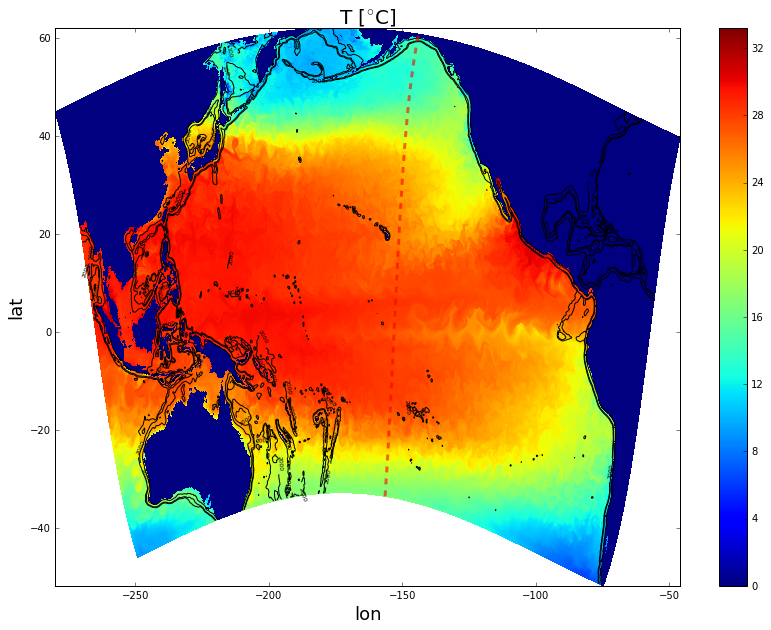

In [3]:
#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(14.0,10.0)) 

###################

ax1 = plt.subplot(1,1,1);

plt.pcolormesh(lon,lat,temp[:,:,-1],cmap = plt.cm.jet);plt.colorbar()

CS1 = plt.contour(lon,lat,topo,[100,1000,2000],colors = ('k',), linewidths = (1.,)); 
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.plot(lon[ix,:],lat[ix,:],'r--',linewidth=3,alpha=0.6)

plt.xlabel(r'lon',fontsize=18)
plt.ylabel(r'lat',fontsize=18)

plt.title(r'T [$^{\circ}$C]', fontsize=20)



In [4]:
###################################################################################
#Compute vertical coordinates 
###################################################################################

(z_r,z_w) = toolsF.zlevs(topo, zeta[:,:], hc, Cs_r, Cs_w)
del z_w

# define z
[_,_,z] =np.mgrid[0:z_r.shape[0],0:z_r.shape[1],0:z_r.shape[2]]

# define lon in 3d
lat3d = copy(z_r)
for iz in range(lat3d.shape[2]):
    lat3d[:,:,iz] = lat

/usr/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


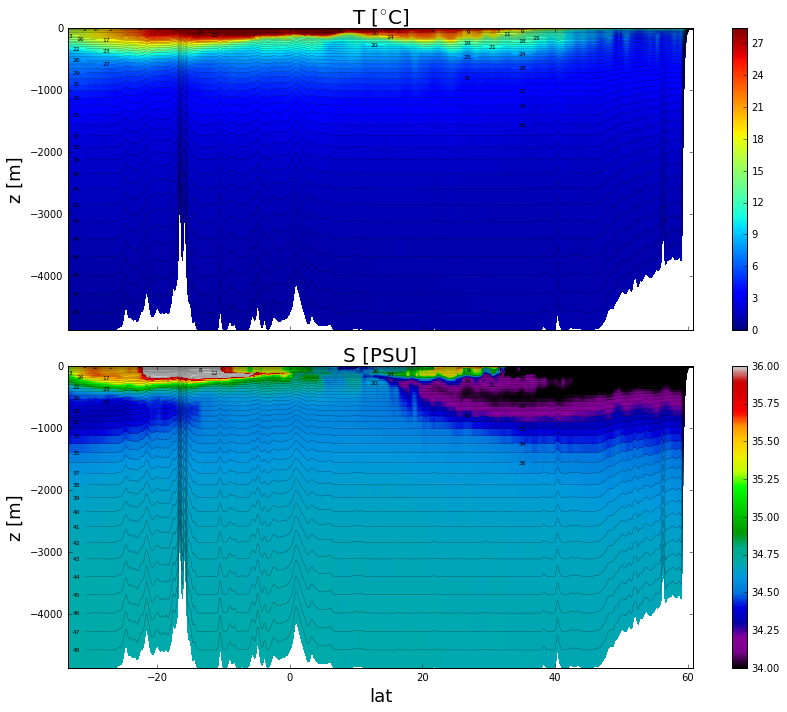

In [5]:
#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(12.0,10.0)) 
fig.set_tight_layout(1.)

###################

ax1 = plt.subplot(2,1,1);
plt.pcolormesh(lat3d[ix,:,:],z_r[ix,:,:],temp[ix,:,:],cmap = plt.cm.jet);plt.colorbar()
CS1 = plt.contour(lat3d[ix,:,:],z_r[ix,:,:],np.max(z) - z[ix,:,:],range(100),colors = ('k',), linewidths = (0.2,)); 
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
ax1.xaxis.set_major_formatter( NullFormatter() )
plt.ylabel(r'z [m]',fontsize=18)
plt.title(r'T [$^{\circ}$C]', fontsize=20)

###################

ax2 = plt.subplot(2,1,2);
levelsvar = np.linspace(34.,36.,100)

plt.pcolormesh(lat3d[ix,:,:],z_r[ix,:,:],salt[ix,:,:],vmin = levelsvar.min(), vmax = levelsvar.max(),cmap = plt.cm.spectral);plt.colorbar()
CS1 = plt.contour(lat3d[ix,:,:],z_r[ix,:,:],np.max(z) - z[ix,:,:],range(100),colors = ('k',), linewidths = (0.2,)); 
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
plt.ylabel(r'z [m]',fontsize=18)
plt.xlabel(r'lat',fontsize=18)

plt.title(r'S [PSU]', fontsize=20)


5000.0000000000109